### Models with weather data of Origin and destination merged


In [1]:
import pandas as pd
import os
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder,Imputer
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,classification_report,roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV, StratifiedKFold,RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
## Reading input data (train/test) from preprocessed csv files.
inputData = pd.read_csv("train_model_input_std.csv",header=0,na_values=["NA"," "],index_col="FlightNumber")
testData = pd.read_csv("test_model_input_std.csv",header=0,na_values=["NA"," "],index_col="FlightNumber")

In [3]:
inputData.shape

(7861, 41)

In [4]:
inputData.head()

,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,flightDelayStatus,...,Longitude_y,TimeZone_y,Visibility_y,DBT_y,DewPointTemp_y,RelativeHumidityPercent_y,WindDirection_y,WindGustValue_y,StationPressure_y,HourlyPrecip_y
FlightNumber,,,,,,,,,,,,,,,,,,,,,
BOS_CLE_29089,4,19,0,0.495268,0.344018,0.105788,27,43,0.100961,0,...,0.826856,0.166667,1.000000,0.677837,0.661236,0.591659,0.302083,0.000000,0.806957,0.000000
CLE_ATL_44346,5,18,4,0.772871,0.618775,0.105788,45,13,0.099121,1,...,0.798732,0.166667,0.657766,0.666224,0.727235,0.773144,0.373843,0.000000,0.750379,0.013817
SNA_LAS_44378,2,3,1,1.000000,0.772181,0.001996,205,115,0.032087,0,...,0.483330,0.666667,1.000000,0.897810,0.474937,0.026123,0.496528,0.119512,0.546440,0.000000
CLT_TPA_51502,3,5,1,0.747634,0.560962,0.063872,47,207,0.089720,0,...,0.818572,0.166667,0.943324,0.867950,0.951963,0.707608,0.413194,0.022339,0.887834,0.000000
MSP_ORD_44884,4,22,3,0.388013,0.224957,0.029940,153,155,0.054159,0,...,0.765085,0.333333,0.917166,0.769409,0.741855,0.521998,0.478009,0.059198,0.798916,0.000000


In [5]:
inputData.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'ScheduledDepTime',
       'ScheduledArrTime', 'ScheduledTravelTime', 'Origin', 'Destination',
       'Distance', 'flightDelayStatus', 'YearMonthDay', 'WeatherStationID_x',
       'GroundHeight_x', 'StationHeight_x', 'BarometerHeight_x', 'Latitude_x',
       'Longitude_x', 'TimeZone_x', 'Visibility_x', 'DBT_x', 'DewPointTemp_x',
       'RelativeHumidityPercent_x', 'WindDirection_x', 'WindGustValue_x',
       'StationPressure_x', 'HourlyPrecip_x', 'WeatherStationID_y',
       'GroundHeight_y', 'StationHeight_y', 'BarometerHeight_y', 'Latitude_y',
       'Longitude_y', 'TimeZone_y', 'Visibility_y', 'DBT_y', 'DewPointTemp_y',
       'RelativeHumidityPercent_y', 'WindDirection_y', 'WindGustValue_y',
       'StationPressure_y', 'HourlyPrecip_y'],
      dtype='object')

In [6]:
testData.head()

,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,YearMonthDay,...,Longitude_y,TimeZone_y,Visibility_y,DBT_y,DewPointTemp_y,RelativeHumidityPercent_y,WindDirection_y,WindGustValue_y,StationPressure_y,HourlyPrecip_y
FlightNumber,,,,,,,,,,,,,,,,,,,,,
DEN_XNA_62349,2,11,0,0.820820,0.688609,0.077844,57,205,0.111792,10.506317,...,0.697177,0.333333,0.734060,0.807233,0.793233,0.520623,0.476852,0.044678,0.697122,0.0
RIC_EWR_87213,3,13,0,0.684543,0.493417,0.027944,174,63,0.042714,10.702624,...,0.902639,0.166667,1.000000,0.671533,0.578112,0.429423,0.656250,0.040210,0.910092,0.0
IAD_GSO_86576,2,27,2,0.520505,0.338294,0.005988,97,83,0.034744,10.521866,...,0.846799,0.166667,1.000000,0.757797,0.782373,0.627864,0.275463,0.000000,0.757604,0.0
SAV_CVG_87264,3,17,4,0.570978,0.428735,0.081836,181,48,0.091151,10.706511,...,0.797300,0.166667,0.952044,0.427339,0.376775,0.613657,0.417824,0.000000,0.792390,0.0
SBP_LAX_68158,1,4,1,0.261830,0.103034,0.003992,184,109,0.017576,10.305151,...,0.451115,0.666667,0.484469,0.708029,0.784879,0.789643,0.508102,0.021222,0.819194,0.0


In [7]:
inputData.head()

,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,flightDelayStatus,...,Longitude_y,TimeZone_y,Visibility_y,DBT_y,DewPointTemp_y,RelativeHumidityPercent_y,WindDirection_y,WindGustValue_y,StationPressure_y,HourlyPrecip_y
FlightNumber,,,,,,,,,,,,,,,,,,,,,
BOS_CLE_29089,4,19,0,0.495268,0.344018,0.105788,27,43,0.100961,0,...,0.826856,0.166667,1.000000,0.677837,0.661236,0.591659,0.302083,0.000000,0.806957,0.000000
CLE_ATL_44346,5,18,4,0.772871,0.618775,0.105788,45,13,0.099121,1,...,0.798732,0.166667,0.657766,0.666224,0.727235,0.773144,0.373843,0.000000,0.750379,0.013817
SNA_LAS_44378,2,3,1,1.000000,0.772181,0.001996,205,115,0.032087,0,...,0.483330,0.666667,1.000000,0.897810,0.474937,0.026123,0.496528,0.119512,0.546440,0.000000
CLT_TPA_51502,3,5,1,0.747634,0.560962,0.063872,47,207,0.089720,0,...,0.818572,0.166667,0.943324,0.867950,0.951963,0.707608,0.413194,0.022339,0.887834,0.000000
MSP_ORD_44884,4,22,3,0.388013,0.224957,0.029940,153,155,0.054159,0,...,0.765085,0.333333,0.917166,0.769409,0.741855,0.521998,0.478009,0.059198,0.798916,0.000000


In [8]:
inputData.dtypes

Month                          int64
DayofMonth                     int64
DayOfWeek                      int64
ScheduledDepTime             float64
ScheduledArrTime             float64
ScheduledTravelTime          float64
Origin                         int64
Destination                    int64
Distance                     float64
flightDelayStatus              int64
YearMonthDay                 float64
WeatherStationID_x           float64
GroundHeight_x               float64
StationHeight_x              float64
BarometerHeight_x            float64
Latitude_x                   float64
Longitude_x                  float64
TimeZone_x                   float64
Visibility_x                 float64
DBT_x                        float64
DewPointTemp_x               float64
RelativeHumidityPercent_x    float64
WindDirection_x              float64
WindGustValue_x              float64
StationPressure_x            float64
HourlyPrecip_x               float64
WeatherStationID_y           float64
G

In [9]:
inputData.describe()

,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,flightDelayStatus,...,Longitude_y,TimeZone_y,Visibility_y,DBT_y,DewPointTemp_y,RelativeHumidityPercent_y,WindDirection_y,WindGustValue_y,StationPressure_y,HourlyPrecip_y
count,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,...,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000
mean,3.060425,14.441292,2.960946,0.620331,0.491833,0.136974,110.092355,102.350464,0.137904,0.193232,...,0.717997,0.321501,0.876634,0.719206,0.736308,0.656712,0.459261,0.052392,0.760049,0.026738
std,1.411165,9.049019,1.980921,0.223926,0.211642,0.126292,62.433381,59.912529,0.106812,0.394859,...,0.164386,0.187373,0.178375,0.110361,0.148618,0.186539,0.176299,0.100348,0.171333,0.083449
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,6.000000,1.000000,0.432177,0.319405,0.043912,58.000000,52.000000,0.061108,0.000000,...,0.634792,0.166667,0.812534,0.649635,0.635338,0.572411,0.331019,0.000000,0.744261,0.000000
50%,3.000000,14.000000,3.000000,0.630915,0.502003,0.101796,116.000000,101.000000,0.107501,0.000000,...,0.766108,0.333333,0.965123,0.740876,0.767753,0.688359,0.456019,0.000000,0.798800,0.000000
75%,4.000000,22.000000,5.000000,0.822082,0.672582,0.187625,162.000000,155.000000,0.180258,0.000000,...,0.831663,0.333333,1.000000,0.801261,0.855054,0.785060,0.572917,0.058081,0.860331,0.006908
max,5.000000,30.000000,6.000000,1.000000,1.000000,1.000000,222.000000,214.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Model Building



In [10]:
target = inputData['flightDelayStatus']
inputData.drop(['flightDelayStatus'],axis=1,inplace=True)

In [11]:
target.value_counts() ## 80.67 % 

0    6342
1    1519
Name: flightDelayStatus, dtype: int64

#### Train/test split

Stratified sampling with 80:20 ratio of train/validation split

In [12]:
X_train, X_validate,Y_train, Y_validate = train_test_split(inputData,target,test_size=0.2,random_state=1512,stratify=target)

In [13]:
print("X-train shape : ",X_train.shape)
print("X-validate shape : ",X_validate.shape)
print("Y-train shape : ",X_train.shape)
print("Y-validate shape : ",Y_validate.shape)


X-train shape :  (6288, 40)
X-validate shape :  (1573, 40)
Y-train shape :  (6288, 40)
Y-validate shape :  (1573,)


#### Function to createsubmissionfile for grader submission

In [14]:
def createSubmissionFile(modelObj,test_x,filename):
    test_preds = modelObj.predict(test_x)
    test_preds = ['Yes' if x else 'No' for x in test_preds]
    outputDf = pd.DataFrame(data={'FlightNumber':testData.index, "FlightDelayStatus":test_preds})
    outputDf.to_csv(filename,index=False)

#### Function to print Accuracy, F1 scores for fitted model, data given

In [15]:
def printMetrics(modelObj,data_x,actual_y):
    model_preds = modelObj.predict(data_x)
    print("F1 Score : {}%".format(round(getF1Score(modelObj,data_x,actual_y),4)*100))
    print("Accuracy Score : {}%".format(round(accuracy_score(model_preds,actual_y),4)*100))

#### Function to get F1 score from prediction values

In [16]:
def getF1Score(modelObj,data_x,actual_y):
    model_preds = modelObj.predict(data_x)
    return(f1_score(model_preds,actual_y))

#### Function to get Feature Importance dataframe sorted in terms of significance

In [17]:
def getFeatureImportance(rfModel,columnNames):
    impList = rfModel.feature_importances_.tolist()
    featureDf = pd.DataFrame({"Feature":columnNames,'Importance':impList})
    featureDf = featureDf.sort_values(by=['Importance'],ascending=False)
    return featureDf

#### Model 1 : Decision Tree
Decision Tree is chosen because tree algorithms can handle imbalanced data

In [18]:
dt_model = DecisionTreeClassifier(criterion="gini",random_state=1512)

In [19]:
dt_model_fitted = dt_model.fit(X_train,Y_train)

In [20]:
printMetrics(dt_model_fitted,X_train,Y_train)

F1 Score : 100.0%
Accuracy Score : 100.0%


In [21]:
printMetrics(dt_model_fitted,X_validate,Y_validate)

F1 Score : 58.709999999999994%
Accuracy Score : 83.28%


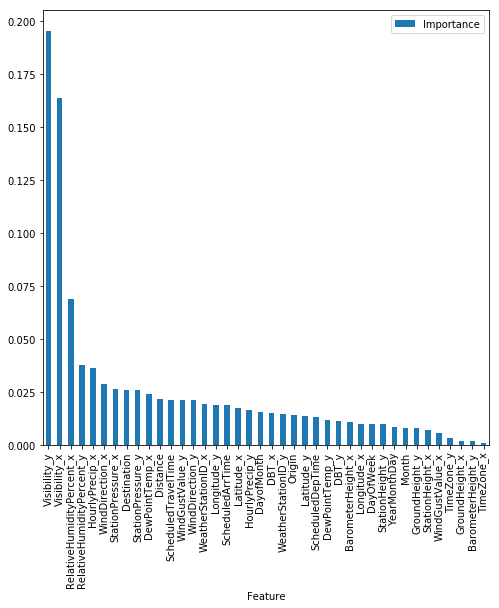

In [22]:
dt_feature_imp = getFeatureImportance(dt_model_fitted,X_train.columns)
dt_feature_imp.plot(kind="bar",figsize=(8,8),x=dt_feature_imp['Feature'])

### Tuning Decision Tree

##### F1 Scores Vs Max Depth 

In [23]:
### F1 score vs maxDepth ( Maximum depth of tree)
train_f1 = []
validation_f1 = []
depths = np.arange(3,30)

for depth in depths:
    tree_depth = DecisionTreeClassifier(max_depth=depth)
    tree_fitted = tree_depth.fit(X_train,Y_train)
    train_f1.append(getF1Score(tree_fitted,X_train,Y_train))
    validation_f1.append(getF1Score(tree_fitted,X_validate,Y_validate))

# create data frame with maxdepth vs train/validation f1 scores
train_f1_maxdepth = pd.DataFrame({"Max Depth":depths, "Train_F1":train_f1, "Validation_F1":validation_f1})

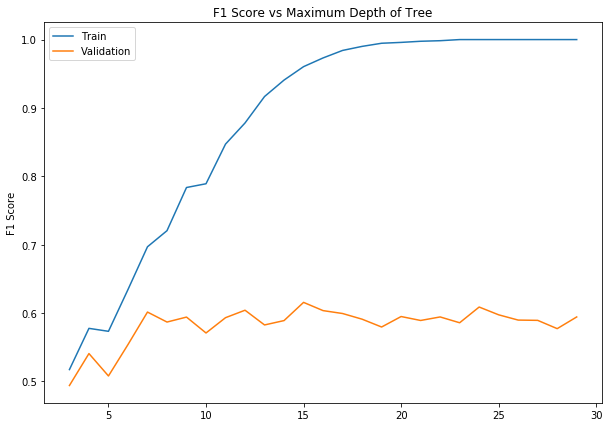

In [24]:
## plotting train/validation f1 scores w.r.t maxdepth
fig,ax = plt.subplots(1,1,figsize=(10,7))
ax.plot(depths,train_f1_maxdepth['Train_F1'],label='Train')
ax.plot(depths,train_f1_maxdepth['Validation_F1'],label='Validation')
ax.legend()
plt.ylabel('F1 Score')
plt.title('F1 Score vs Maximum Depth of Tree')
plt.show()

In [25]:
## Using stratified K fold validation
stratKFold = StratifiedKFold(n_splits= 5,shuffle= True, random_state= 1512)

In [26]:
grid_params = {"max_depth":np.arange(3,30),
               'min_samples_split' : np.arange(2,20,2),
              'min_samples_leaf' : np.arange(1,21,2),
               "random_state":[715]}

gridSearchDt = GridSearchCV(DecisionTreeClassifier(), grid_params, scoring='f1', n_jobs=-1, cv = stratKFold, verbose = 1)

%time gridSearchDt.fit(X_train,Y_train)

Fitting 5 folds for each of 2430 candidates, totalling 12150 fits


[Parallel(n_jobs=-1)]: Done  47 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 347 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 847 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 1547 tasks      | elapsed:   41.7s
[Parallel(n_jobs=-1)]: Done 2447 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 3547 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 4847 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 6168 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 7018 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 7968 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 9018 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 10168 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 11418 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 12150 out of 12150 | elapsed:  9.1min finished


Wall time: 9min 4s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1512, shuffle=True),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29]), 'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]), 'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]), 'random_state': [715]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=1)

In [27]:
best_dt_tree = gridSearchDt.best_estimator_
best_dt_tree = best_dt_tree.fit(X_train,Y_train)

In [28]:
printMetrics(best_dt_tree,X_train,Y_train)

F1 Score : 72.39999999999999%
Accuracy Score : 89.74%


In [29]:
printMetrics(best_dt_tree,X_validate,Y_validate)

F1 Score : 61.53999999999999%
Accuracy Score : 85.7%


In [30]:
createSubmissionFile(best_dt_tree,testData,"submission_best_dt.csv")

### Model 2 : Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rf_model = RandomForestClassifier(n_jobs=-1,random_state=715)
rf_model_fitted = rf_model.fit(X_train,Y_train)

In [33]:
printMetrics(rf_model_fitted,X_train,Y_train)

F1 Score : 96.57%
Accuracy Score : 98.71%


In [34]:
printMetrics(rf_model_fitted,X_validate,Y_validate)

F1 Score : 59.96%
Accuracy Score : 87.35000000000001%


In [35]:
createSubmissionFile(rf_model_fitted,testData,"submission_rf_basic.csv")

#### Tuning Random Forest

#### F1 score vs nEstimators

In [36]:
### F1 score vs number of estimators (number of columns to be subsetted for tree building)
train_f1 = []
validation_f1 = []
estimators = np.arange(3,25)

for estimator in estimators:
    tree_depth = RandomForestClassifier(n_estimators=estimator)
    tree_fitted = tree_depth.fit(X_train,Y_train)
    train_f1.append(getF1Score(tree_fitted,X_train,Y_train))
    validation_f1.append(getF1Score(tree_fitted,X_validate,Y_validate))

# create data frame with maxdepth vs train/validation f1 scores
train_f1_maxdepth = pd.DataFrame({"Number of Estimators":estimators, "Train_F1":train_f1, "Validation_F1":validation_f1})

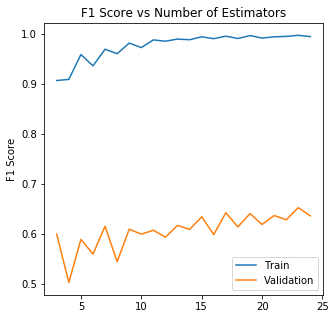

In [37]:
## plotting train/validation f1 scores w.r.t number of estimators
fig,ax = plt.subplots(1,1,figsize=(5,5))
ax.plot(estimators,train_f1_maxdepth['Train_F1'],label='Train')
ax.plot(estimators,train_f1_maxdepth['Validation_F1'],label='Validation')
ax.legend()
plt.ylabel('F1 Score')
plt.title('F1 Score vs Number of Estimators')
plt.show()

In [38]:
## RandomSearch for cross validation
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 5)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(2, 30, num = 15)]
max_depth.append(None)
min_samples_leaf = [int(x) for x in np.linspace(2, 50, num = 25)]
min_samples_split = [int(x) for x in np.linspace(2, 100, num = 50)]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf,
               'min_samples_split' : min_samples_split,
               'n_jobs' : [-1],
               'random_state' : [1512]}

In [39]:
stratKFold = StratifiedKFold(n_splits= 5,shuffle= True, random_state= 1512)

In [40]:
forest_random = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid, 
                               n_iter = 50, cv =stratKFold , random_state=1512, n_jobs = -1,scoring = 'f1',verbose=1)
%time forest_random.fit(X_train,Y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.1min finished


Wall time: 2min 4s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1512, shuffle=True),
          error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=50, n_jobs=-1,
          param_distributions={'n_estimators': [10, 57, 105, 152, 200], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, None], 'min_samples_leaf': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50], '...2, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100], 'n_jobs': 

In [41]:
best_rf_tuned = forest_random.best_estimator_
print(best_rf_tuned)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=40,
            min_weight_fraction_leaf=0.0, n_estimators=57, n_jobs=-1,
            oob_score=False, random_state=1512, verbose=0,
            warm_start=False)


In [42]:
best_rf_fitted = best_rf_tuned.fit(X_train,Y_train)
printMetrics(best_rf_fitted,X_train,Y_train)

F1 Score : 73.16%
Accuracy Score : 91.36%


In [43]:
printMetrics(best_rf_fitted,X_validate,Y_validate)

F1 Score : 60.62%
Accuracy Score : 87.86%


In [44]:
createSubmissionFile(best_rf_fitted,testData,"submission_rf_tuned_origdest.csv")

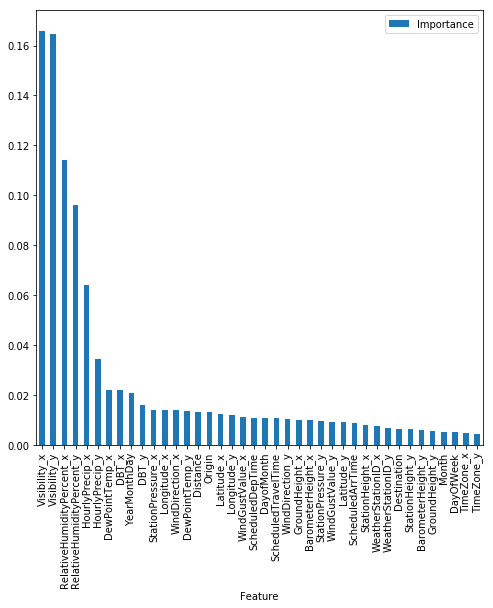

In [45]:
## Rf with imp attributes 
featureImpDf = getFeatureImportance(best_rf_fitted,inputData.columns)
featureImpDf.plot(kind="bar",figsize=(8,8),x=featureImpDf['Feature'])

#### Model 3 : XG Boost

In [46]:
from xgboost import XGBClassifier

In [47]:
xgb_model = XGBClassifier(n_jobs=-1)
xgb_fitted = xgb_model.fit(X_train,Y_train)

In [48]:
printMetrics(xgb_fitted,X_train,Y_train)

F1 Score : 69.42%
Accuracy Score : 90.11%


In [49]:
printMetrics(xgb_fitted,X_validate,Y_validate)

F1 Score : 65.35%
Accuracy Score : 88.87%


In [50]:
createSubmissionFile(xgb_fitted,testData,"submission_xgb_basic_origdest.csv")

In [51]:
eval_set = [(X_validate, Y_validate)]
xgb_cv_fitted = xgb_model.fit(X=X_train, y=Y_train,early_stopping_rounds=200, eval_set=eval_set,eval_metric="auc",verbose=True)

[0]	validation_0-auc:0.860796
Will train until validation_0-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.884705
[2]	validation_0-auc:0.881079
[3]	validation_0-auc:0.886658
[4]	validation_0-auc:0.890223
[5]	validation_0-auc:0.897662
[6]	validation_0-auc:0.899649
[7]	validation_0-auc:0.900578
[8]	validation_0-auc:0.901579
[9]	validation_0-auc:0.903366
[10]	validation_0-auc:0.904861
[11]	validation_0-auc:0.905213
[12]	validation_0-auc:0.905467
[13]	validation_0-auc:0.906634
[14]	validation_0-auc:0.906927
[15]	validation_0-auc:0.906377
[16]	validation_0-auc:0.906684
[17]	validation_0-auc:0.907146
[18]	validation_0-auc:0.906932
[19]	validation_0-auc:0.906875
[20]	validation_0-auc:0.907782
[21]	validation_0-auc:0.907785
[22]	validation_0-auc:0.908044
[23]	validation_0-auc:0.908036
[24]	validation_0-auc:0.909304
[25]	validation_0-auc:0.909484
[26]	validation_0-auc:0.910399
[27]	validation_0-auc:0.91122
[28]	validation_0-auc:0.910861
[29]	validation_0-auc:0.912902
[30]	validation_

In [52]:
print(xgb_cv_fitted)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)


In [53]:
printMetrics(xgb_cv_fitted,X_train,Y_train)

F1 Score : 69.42%
Accuracy Score : 90.11%


In [54]:
printMetrics(xgb_cv_fitted,X_validate,Y_validate)
createSubmissionFile(xgb_cv_fitted,testData,"submission_xgb_best_origdest.csv")

F1 Score : 65.35%
Accuracy Score : 88.87%


In [55]:
print(classification_report(Y_validate, xgb_cv_fitted.predict(X_validate), target_names=['No','Yes']))

             precision    recall  f1-score   support

         No       0.90      0.97      0.93      1269
        Yes       0.82      0.54      0.65       304

avg / total       0.88      0.89      0.88      1573



#### Model 4 :  Ada Boost

In [56]:
from sklearn.ensemble import AdaBoostClassifier

In [57]:
dt = DecisionTreeClassifier()
ada_model_origdest = AdaBoostClassifier(base_estimator=dt, n_estimators=200, learning_rate=0.1,random_state=1512)
ada_model_fitted = ada_model_origdest.fit(X_train,Y_train)

In [58]:
print(ada_model_fitted)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.1, n_estimators=200, random_state=1512)


In [59]:
printMetrics(ada_model_fitted, X_train, Y_train)

F1 Score : 100.0%
Accuracy Score : 100.0%


In [60]:
printMetrics(ada_model_fitted,X_validate,Y_validate)
createSubmissionFile(ada_model_fitted,testData,"submission_ada_basic.csv")

F1 Score : 58.919999999999995%
Accuracy Score : 83.6%


### Picking Top 20 attributes from Random Forest Importance

In [61]:
Rf_top_features = featureImpDf.Feature[0:19]
## taking copy of original 
train_rfimp = X_train.copy()
validation_rfimp = X_validate.copy()
test_rfImp = testData.copy()


## creating new data frames with only top features
train_rfimp = train_rfimp[Rf_top_features]
validation_rfimp = validation_rfimp[Rf_top_features]
test_rfImp = test_rfImp[Rf_top_features]

In [62]:
best_dt_tree_imp = best_dt_tree.fit(train_rfimp,Y_train)
print ("**** Decision Tree - Random Forest Important Attributes ****")
print("Train Metrics :")
printMetrics(best_dt_tree_imp, train_rfimp, Y_train)
print("Validation Metrics :")
printMetrics(best_dt_tree_imp, validation_rfimp, Y_validate)
createSubmissionFile(best_dt_tree_imp,test_rfImp,"submission_ada_basic.csv")

**** Decision Tree - Random Forest Important Attributes ****
Train Metrics :
F1 Score : 70.54%
Accuracy Score : 89.34%
Validation Metrics :
F1 Score : 61.919999999999995%
Accuracy Score : 86.4%


In [63]:
best_rf_fitted_imp = best_rf_fitted.fit(train_rfimp,Y_train)
print ("**** Random Forest - Top 20  Important Attributes ****")
print("Train Metrics :")
printMetrics(best_rf_fitted_imp, train_rfimp, Y_train)
print("Validation Metrics :")
printMetrics(best_rf_fitted_imp, validation_rfimp, Y_validate)
createSubmissionFile(best_dt_tree_imp,test_rfImp,"submission_ada_basic.csv")

**** Random Forest - Top 20  Important Attributes ****
Train Metrics :
F1 Score : 73.56%
Accuracy Score : 91.3%
Validation Metrics :
F1 Score : 63.18%
Accuracy Score : 88.37%


In [64]:
xgb_cv_fitted_imp = xgb_cv_fitted.fit(train_rfimp,Y_train)
print ("**** XGB Boost - Random Forest Top 20  Important Attributes ****")
print("Train Metrics :")
printMetrics(xgb_cv_fitted_imp, train_rfimp, Y_train)
print("Validation Metrics :")
printMetrics(xgb_cv_fitted_imp, validation_rfimp, Y_validate)
createSubmissionFile(xgb_cv_fitted_imp,test_rfImp,"submission_xgb_toprf20.csv")

**** XGB Boost - Random Forest Top 20  Important Attributes ****
Train Metrics :
F1 Score : 67.2%
Accuracy Score : 89.49000000000001%
Validation Metrics :
F1 Score : 64.81%
Accuracy Score : 88.75%


In [65]:
## trying various thresholds 
thresholds = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for value in thresholds:
    xgb_model_temp = XGBClassifier(base_score=value, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)
    xgb_fitted_tmp = xgb_model_temp.fit(train_rfimp,Y_train)
    print( " THRESHOLD : ",value)
    print("Train Metrics :")
    printMetrics(xgb_fitted_tmp, train_rfimp, Y_train)
    print("Validation Metrics :")
    printMetrics(xgb_fitted_tmp, validation_rfimp, Y_validate)
    print("-------------------------------------------------")

 THRESHOLD :  0.2
Train Metrics :
F1 Score : 68.24%
Accuracy Score : 89.73%
Validation Metrics :
F1 Score : 63.71%
Accuracy Score : 88.56%
-------------------------------------------------
 THRESHOLD :  0.3
Train Metrics :
F1 Score : 68.24%
Accuracy Score : 89.74%
Validation Metrics :
F1 Score : 63.980000000000004%
Accuracy Score : 88.62%
-------------------------------------------------
 THRESHOLD :  0.4
Train Metrics :
F1 Score : 67.36%
Accuracy Score : 89.53999999999999%
Validation Metrics :
F1 Score : 66.0%
Accuracy Score : 89.13%
-------------------------------------------------
 THRESHOLD :  0.5
Train Metrics :
F1 Score : 67.2%
Accuracy Score : 89.49000000000001%
Validation Metrics :
F1 Score : 64.81%
Accuracy Score : 88.75%
-------------------------------------------------
 THRESHOLD :  0.6
Train Metrics :
F1 Score : 67.25999999999999%
Accuracy Score : 89.46%
Validation Metrics :
F1 Score : 65.07%
Accuracy Score : 88.87%
-------------------------------------------------
 THRESHO

In [66]:
#Threshold = 0.7 chosen

xgb_model_temp = XGBClassifier(base_score=0.7, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)
xgb_fitted_tmp = xgb_model_temp.fit(train_rfimp,Y_train)
print("Train Metrics :")
printMetrics(xgb_fitted_tmp, train_rfimp, Y_train)
print("Validation Metrics :")
printMetrics(xgb_fitted_tmp, validation_rfimp, Y_validate)
print("-------------------------------------------------")

Train Metrics :
F1 Score : 67.52%
Accuracy Score : 89.55%
Validation Metrics :
F1 Score : 65.34%
Accuracy Score : 88.94%
-------------------------------------------------


In [67]:
createSubmissionFile(xgb_fitted_tmp,test_rfImp,"submission_xgb_bestThreshold.csv")

In [68]:
xgb_model_temp = XGBClassifier(base_score=0.7, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)
xgb_fitted_tmp = xgb_model_temp.fit(X_train,Y_train)
print("Train Metrics :")
printMetrics(xgb_fitted_tmp, X_train, Y_train)
print("Validation Metrics :")
printMetrics(xgb_fitted_tmp, X_validate, Y_validate)
print("-------------------------------------------------")

Train Metrics :
F1 Score : 69.26%
Accuracy Score : 90.08%
Validation Metrics :
F1 Score : 65.07%
Accuracy Score : 88.87%
-------------------------------------------------


In [69]:
createSubmissionFile(xgb_fitted_tmp,testData,"allvars_xgb_bestThreshold.csv")